# Vimmi Exam

In [126]:
# imports
from dotenv import load_dotenv
import pandas as pd
import requests
import sqlite3
import json
from assets.scripts.script import upload_movies
import matplotlib.pyplot as plt
import os

load_dotenv()

True

## Personal information

1. What is your full name?

    > Grechaniy Viacheslav

2. What is your contact information?


    > LinkedIn: [link](https://www.linkedin.com/in/viacheslav-grechaniy/)

    > Telegram: [link](https://t.me/grechaniydev)

    > Number: +380 93 874 35 26


3. What is your python development level? Junior, Mid or Senior?

    > Middle dev


4. How many years do you already have in python development? How many as professional (In a company) How many as a student or as a hobby?

    > 4 years in development, 5 in general(started as a hobby)


5. How many years do you already have as a backend developer? How many as professional (In a company) How many as a student or as a hobby?

    > 4 years

## Programing

Please provide a clear answer and the relevant code for each question.

1.      Between 28 to 117, how many numbers include the digit 7?

In [127]:
numbers = [item for item in range(37, 118) if "7" in str(item)]
print(f"{len(numbers)} digits include the digit 7 in arr between 28 to 117")

18 digits include the digit 7 in arr between 28 to 117


2.       What is the average number of the group of numbers from the question above?

In [128]:
average_number = sum(numbers) / len(numbers)
print(
    f"The average number of the group of numbers from the question above is {average_number}"
)

The average number of the group of numbers from the question above is 75.61111111111111


3.        What is the sum of squares of that group?

In [129]:
print(f"The sum of squares is {sum([square**2 for square in numbers])} ")

The sum of squares is 109017 


4.         Provide a general function to resolve Q1. Where the inputs are the minimum and the maximum number in the range and the last parameter is the digit. For example, func(28, 117, 7) will return the answer for Q1. Provide the answer for func(98, 207, 0)|

In [130]:
def counted_digits(min_num, max_num, digit):
    """
    The inputs are the minimum and the maximum number
    in the range and the last parameter is the digit.
    """
    digit = str(digit)
    return sum(1 for num in range(min_num, max_num + 1) if digit in str(num))


result = counted_digits(98, 207, 0)

5.         As in Q4, but with lambada. And an answer for lam(111, 1011, 11)

In [131]:
counted_digits_lamda = lambda min_num, max_num, digit: sum(
    1 for num in range(min_num, max_num + 1) if str(digit) in str(num)
)
result_lambda = counted_digits_lamda(111, 1011, 11)
print(result_lambda)

18


# Data management

Please provide a clear answer and the relevant code for each question.

1.      The attached json file has a list of the top-250 movies in imdb.com. What is the average imdb-rating of the top-10 movies?

In [132]:
with open("assets/files/imdb_top250_20jun.json", "r") as file:
    data = pd.DataFrame(json.load(file)["items"])
data.head()

,id,rank,title,fullTitle,year,image,crew,imDbRating,imDbRatingCount
0,tt0111161,1,The Shawshank Redemption,The Shawshank Redemption (1994),1994,https://imdb-api.com/images/original/MV5BMDFkY...,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.2,2599768
1,tt0068646,2,The Godfather,The Godfather (1972),1972,https://imdb-api.com/images/original/MV5BM2MyN...,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.2,1795226
2,tt0468569,3,The Dark Knight,The Dark Knight (2008),2008,https://imdb-api.com/images/original/MV5BMTMxN...,"Christopher Nolan (dir.), Christian Bale, Heat...",9.0,2571118
3,tt0071562,4,The Godfather Part II,The Godfather Part II (1974),1974,https://imdb-api.com/images/original/MV5BMWMwM...,"Francis Ford Coppola (dir.), Al Pacino, Robert...",9.0,1237169
4,tt0050083,5,12 Angry Men,12 Angry Men (1957),1957,https://imdb-api.com/images/original/MV5BMWU4N...,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.9,768136


In [133]:
data["imDbRating"] = pd.to_numeric(data["imDbRating"], errors="coerce")

average_rating = round(data.head(10)["imDbRating"].mean(), 3)
print(f"The average imdb-rating of the top-10 movies is {average_rating}")

The average imdb-rating of the top-10 movies is 8.96


2.      At about what time the top-50 movies were published?

In [134]:
data["year"] = pd.to_numeric(data["year"], errors="coerce")

top_50_movies = data.nlargest(50, "imDbRating")
top_50_avg_year = round(top_50_movies["year"].mean())
top_50_median_year = round(top_50_movies["year"].median())


top_50_movies_sorted = top_50_movies.sort_values(by="year")
print(f"The average year for the top 50 movies is {top_50_avg_year}.")
print(f"The median year for the top 50 movies is {top_50_median_year}.")

The average year for the top 50 movies is 1989.
The median year for the top 50 movies is 1994.


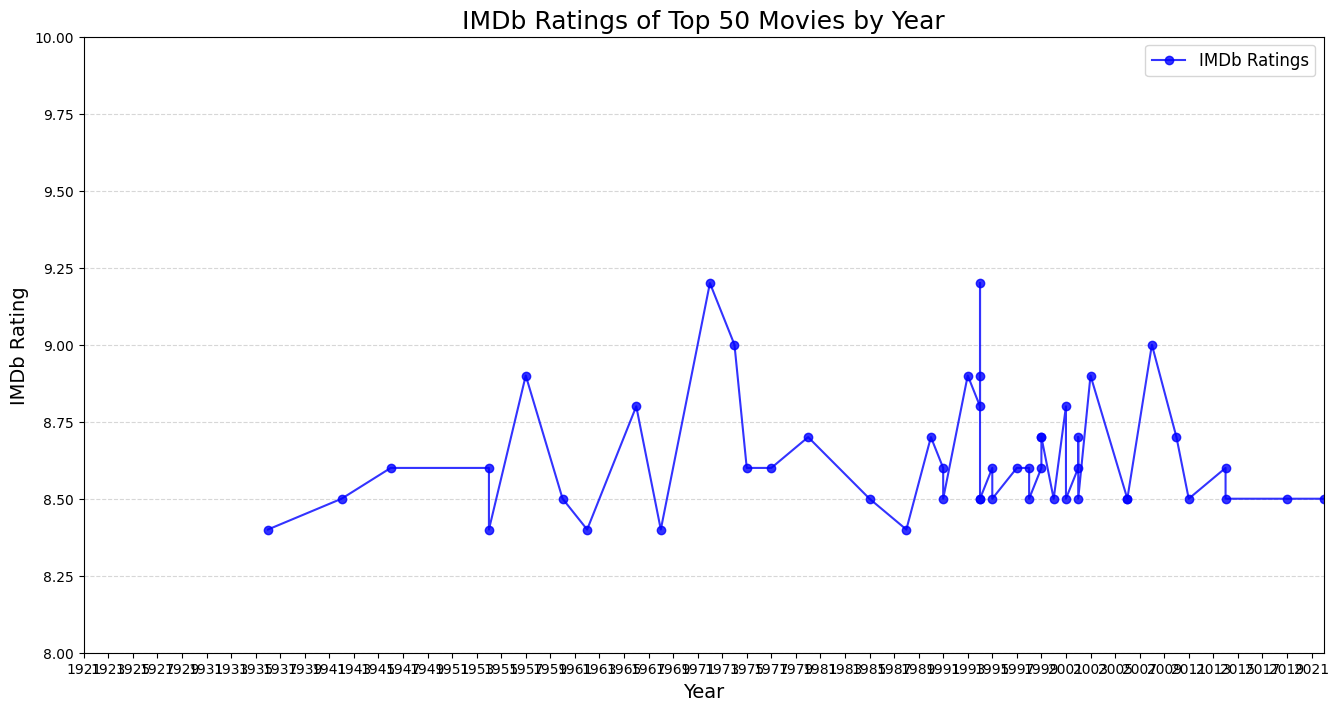

In [135]:
plt.figure(figsize=(16, 8))
plt.plot(
    top_50_movies_sorted["year"],
    top_50_movies_sorted["imDbRating"],
    marker="o",
    color="blue",
    alpha=0.8,
    label="IMDb Ratings",
)

plt.title("IMDb Ratings of Top 50 Movies by Year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("IMDb Rating", fontsize=14)
plt.xticks(range(int(data["year"].min()), int(data["year"].max()) + 1, 2))
plt.xlim(data["year"].min(), data["year"].max())
plt.ylim(8, 10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.show()

3.      Provide a table with average rating and "average" publication time for each 10 movies from the top-10 to end of the list. For each row, provide the title of the best movie.

In [136]:
result = []
for i in range(10, len(data), 10):
    group = data.iloc[i:i + 10]
    avg_rating = group["imDbRating"].mean()
    avg_year = group["year"].mean()
    best_movie = group.loc[group["imDbRating"].idxmax(), "title"]

    result.append(
        {
            "Group Start Rank": f"{i}-{i + 10}",
            "Average Rating": round(avg_rating, 3),
            "Average Year": round(avg_year),
            "Best Movie": best_movie,
        }
    )

results_df = pd.DataFrame(result)
results_df

,Group Start Rank,Average Rating,Average Year,Best Movie
0,10-20,8.68,1990,Forrest Gump
1,20-30,8.58,1990,It's a Wonderful Life
2,30-40,8.50,1997,Spirited Away
3,40-50,8.45,1980,The Prestige
4,50-60,8.40,1983,Alien
5,60-70,8.35,1983,Paths of Glory
6,70-80,8.30,2002,Oldboy
7,80-90,8.30,1992,Once Upon a Time in America
8,90-100,8.28,1974,Reservoir Dogs
9,100-110,8.20,1969,A Clockwork Orange


4.      Such data should be saved in a common database. How will you do that? Provide an example (pseudo) code.

1. Connect to the database (create a new one if it doesn’t exist)

2. Create a table `movie_groups` with fields:
    - group_id
    - start_rank
    - end_rank
    - avg_year
    - avg_rating
    - best_movie_title

3. Load movie data from a JSON file into a list `data`

4. For each group of movies (10 movies per group):
    - Initialize variables to store the total ratings and release years
    - Find the movie with the highest rating in the group

    - For each movie in the current group:
        - Add the movie’s rating to the total group rating
        - Add the movie’s release year to the total group release years
        - If the movie’s rating is higher than the current max rating, update `best_movie_title`
    
    - Calculate `avg_year` as the integer average of the group’s release years
    - Calculate `avg_rating` as the average of the group’s ratings, rounded to two decimal places

5. Insert the group data into the `movie_groups` 

6. Repeat steps 4 and 5 for each group of movies

7. Commit the changes to the database and close the connection

In [137]:
conn = sqlite3.connect("movies_db.sqlite")
cursor = conn.cursor()

cursor.execute(
    """
CREATE TABLE IF NOT EXISTS movie_groups (
    group_id INTEGER PRIMARY KEY,
    start_rank INTEGER,
    end_rank INTEGER,
    avg_year INTEGER,
    avg_rating REAL,
    best_movie_title TEXT
)
"""
)

for i in range(10, len(data), 10):
    local_list = data[i:i + 10].to_dict("records")

    avg_year = round(sum(int(film["year"]) for film in local_list) / len(local_list))
    avg_rating = round(
        sum(float(film["imDbRating"]) for film in local_list) / len(local_list), 2
    )
    best_movie = max(local_list, key=lambda x: x["imDbRating"])["title"]
    start_rank, end_rank = i, i + len(local_list)

    cursor.execute(
        """
    INSERT INTO movie_groups (start_rank, end_rank, avg_year, avg_rating, best_movie_title)
    VALUES (?, ?, ?, ?, ?)
    """,
        (start_rank, end_rank, avg_year, avg_rating, best_movie),
    )

conn.commit()
conn.close()

![img](https://img001.prntscr.com/file/img001/36VBTbGpSJ2H8IkyeKsieA.png)

5.      Provide a query examples to find the average rating

.



```SELECT AVG(avg_rating) AS overall_average_rating FROM movie_groups; ```


.

![img](https://img001.prntscr.com/file/img001/6IlcFHWMRxm2ehStTTYLow.png)


6.      Provide a script to upload this data into your suggested DB.

In [138]:
upload_movies("assets/files/imdb_top250_20jun.json")

Data has been uploaded to the database successfully.



7.      The movies list is coming from IMBD: API for IMDb, TMDb, Wikipedia and more - IMDb-API . How will you update the DB with the current top-250 list? You can use this apikey:  Note that you can use it only during the exam time. Please do not use it elsewhere.

In [139]:
API_KEY = os.getenv("API_KEY")
API_URL = f"https://imdb-api.com/en/API/Top250Movies/{API_KEY}/"
response = requests.get(f"{API_URL}")
latest_films = response.json()["items"]

ConnectionError: HTTPSConnectionPool(host='imdb-api.com', port=443): Max retries exceeded with url: /en/API/Top250Movies/k_fjjgi8pt/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000018D726B8370>: Failed to resolve 'imdb-api.com' ([Errno 11001] getaddrinfo failed)"))


8.      Using the imdb-api, how you'll enrich the movie data with Actors and Genres?

9.      Once your data is enriched with Actors, write a query on your data, to find the top-10 actors on your data. 